<a href="https://colab.research.google.com/github/Parham635/Ice-Cream-Sales/blob/main/Ice_Cream_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
# Import all dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sb
import csv
import io
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

Prepare our dataset and creating a dataframe

In [ ]:
# get the data from remote source
r = requests.get("https://pastebin.com/raw/LAePu8bn") # our data file "IceCreamData.csv"
csvFile = io.StringIO(r.text) # convert the text response to a string file object
iceCreamData = pd.read_csv(csvFile) # parse csv data
df = pd.DataFrame(iceCreamData)
print(df)

     Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]


Describing the Dataset

In [ ]:
iceCreamData.describe() # show description of ice cream data

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


Creating a histogram to further visualise our dataset

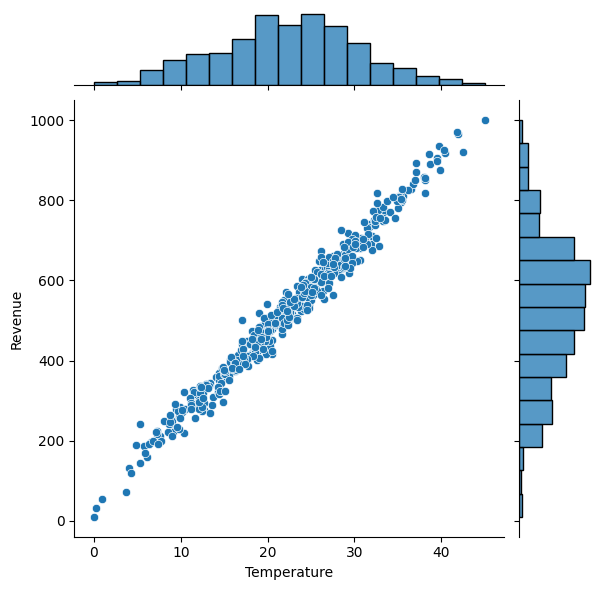

In [ ]:
sns.jointplot( x='Temperature', y='Revenue', data = iceCreamData)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

Covariance and Correlation of our Dataset

In [ ]:
cov=np.cov(iceCreamData['Temperature'],iceCreamData['Revenue'])
print(cov)
corr=iceCreamData[['Temperature','Revenue']].corr()
print(corr)

[[   65.55149117  1405.66162842]
 [ 1405.66162842 30766.82660995]]
             Temperature   Revenue
Temperature     1.000000  0.989802
Revenue         0.989802  1.000000


Creating a Histogram with Seaborn and adding a regression line



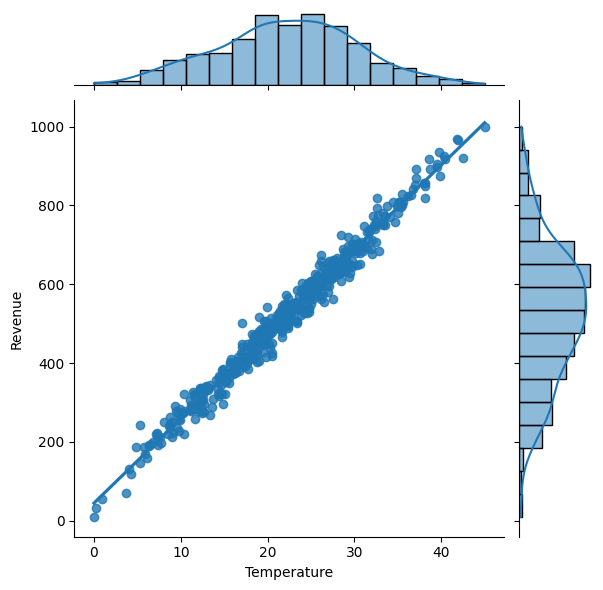

In [ ]:
sns.jointplot( x='Temperature', y='Revenue', data=iceCreamData, kind="reg")
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

Perform OLS regression with our dataset

In [ ]:
x_sm_const = sm.add_constant(iceCreamData['Temperature'])
# perform ordinary least squares (OLS) regression on our dataSet
lr = sm.OLS(iceCreamData['Revenue'], x_sm_const).fit()
# print out constant (y-intercept) and slope coefficient
lr.params

const          44.831267
Temperature    21.443626
dtype: float64

Plot fitted regression line with data points

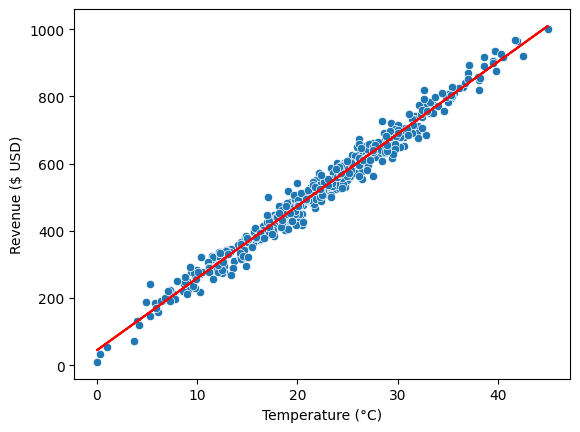

In [ ]:
sns.scatterplot(data = iceCreamData, x="Temperature", y="Revenue")
# plot regression line
plt.plot(iceCreamData['Temperature'], lr.params.const + lr.params["Temperature"]*iceCreamData['Temperature'],'r')
plt.xlabel("Temperature (°C)")
plt.ylabel("Revenue ($ USD)")
plt.show() # show plotted data with fitted regression line

OLS regression table

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.404e+04
Date:                Sat, 22 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:09:44   Log-Likelihood:                -2318.1
No. Observations:                 500   AIC:                             4640.
Df Residuals:                     498   BIC:                             4649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.8313      3.272     13.703      0.000      38.403      51.259
Temperature    21.4436      0.138    155.057      0.000      21.172      21.715
==============================================================================
Omnibus:                        3.595   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                4.192
Skew:                           0.032   Prob(JB):                        0.123
Kurtosis:                       3.444   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ANOVA Table

In [ ]:
# Create anova table
lrModel = smf.ols(formula="Temperature ~ Revenue", data=iceCreamData)
sm.stats.anova_lm(lrModel.fit(), typ=1)


,df,sum_sq,mean_sq,F,PR(>F)
Revenue,1.0,32046.412673,32046.412673,24042.723946,0.0
Residual,498.0,663.781423,1.332894,NaN,NaN


Model Training Based on Linear Regression Model To Find Residuals

In [ ]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
X = iceCreamData['Temperature']
y= iceCreamData['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [ ]:
#Building the model
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

<Figure size 640x480 with 0 Axes>

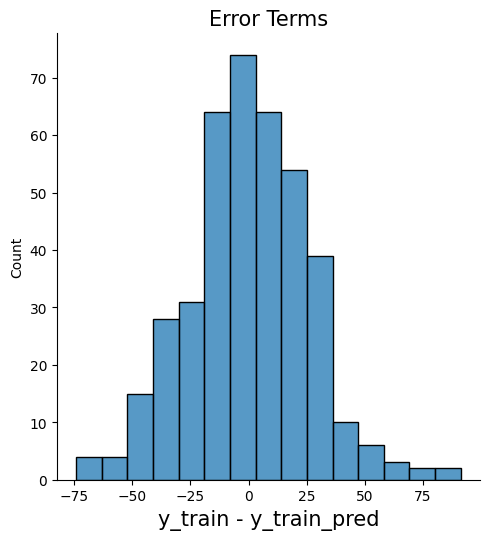

In [ ]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)
# Plotting the histogram using the residual values
fig = plt.figure()
sns.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

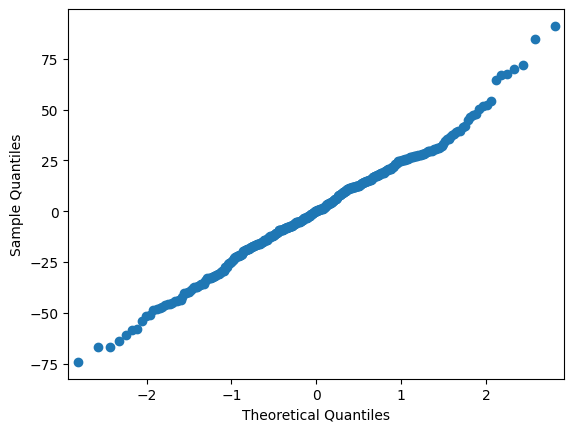

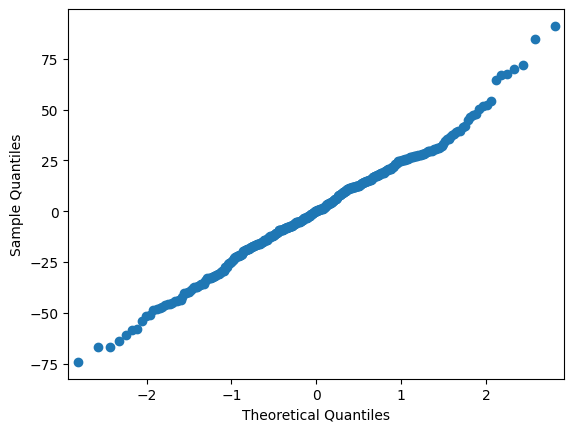

In [ ]:
#Creating a Q-Q plot of residuals to find a linear pattern
sm.qqplot(res)

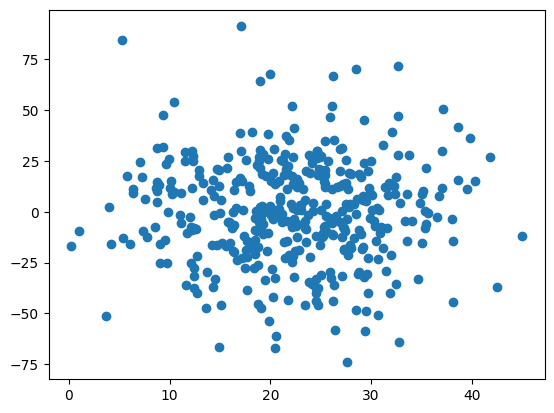

In [ ]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

# Predictive analysis (via regression)

Prepare data for training via data splitting


In [ ]:
d = iceCreamData.values
X,Y = d[:,:-1], d[:,-1]
# x = temps
# y = revenue

Model training with linear regression

In [ ]:
# create a linear regression model instance
regressor = LinearRegression()
# split dataset into two parts: training data and testing data (for both temps=x and revenue=y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# fit the linear regression model to training data for predictions
regressor.fit(X_train, y_train)

LinearRegression()

Perform predictive analysis for accuracy of Regression Model

In [ ]:
# use the learned coefficeints from the regressor object to calulate predicted values
# to calulate overall prediction accuracy
revenue_prediction = regressor.predict(X_test)
print(f"Predictions are {round(r2_score(y_test,revenue_prediction)*100, 3)}% accurate")

Predictions are 98.373% accurate


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
32/32 [==============================] - 1s 12ms/step - loss: 295987.4375 - val_loss: 279686.9688
Epoch 2/80
32/32 [==============================] - 0s 4ms/step - loss: 290226.1562 - val_loss: 274224.2188
Epoch 3/80
32/32 [==============================] - 0s 4ms/step - loss: 284474.3750 - val_loss: 268728.9375
Epoch 4/80
32/32 [==============================] - 0s 6ms/step - loss: 278655.9375 - val_loss: 263003.1562
Epoch 5/80
32/32 [=====

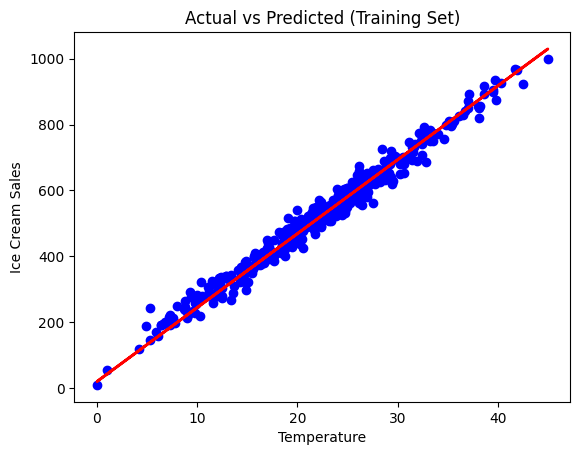

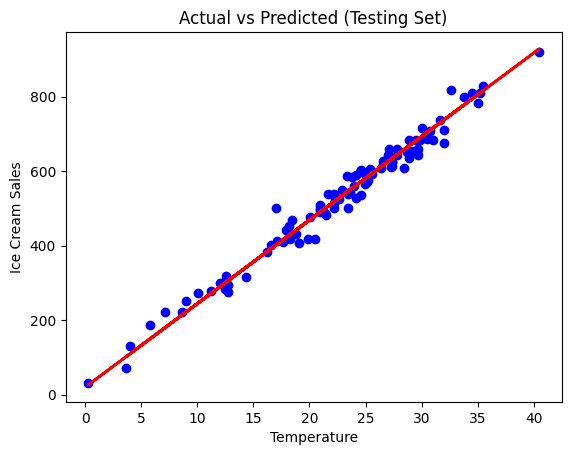

In [ ]:
X = iceCreamData['Temperature'].values.reshape(-1, 1)
y = iceCreamData['Revenue'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(10, input_shape=(X.shape[1],)))
model.add(Dense(1)) # No activation function for regression
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# early stopping callback
# This callback will stop the training when there is no improvement in
# the validation loss for 10 consecutive epochs.
es = EarlyStopping(monitor='val_loss',
                                   mode='min', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, callbacks=[es], epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("R2 Score (Training Set):", r2_train)
print("R2 Score (Testing Set):", r2_test)

# Plot the actual vs predicted values for training set
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred_train, color='red', linewidth=2)
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.show()

# Plot the actual vs predicted values for testing set
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_test, color='red', linewidth=2)
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.show()

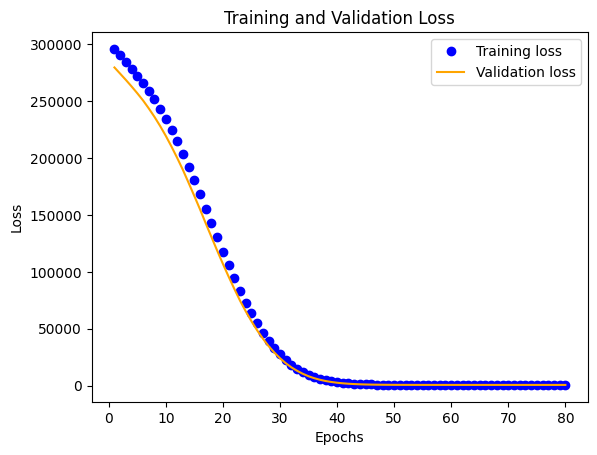

In [ ]:
# Evaluate the Model

history_dict = history.history

# Learning curve (Loss)
# Let's see the training and validation loss by epoch

# Loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Range of X (number of epochs)
epochs = range(1, len(loss_values) + 1)

# Plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()